### **PROJECT: Prediction of Salary of Employees..**

***By: Gowtham Chandu***

<a id="toc"></a>
#### **TABLE OF CONTENTS:**
1. [BACKGROUND AND MOTIVATIONS](#background)<br>
2. [OBJECTIVES](#objectives)<br>
3. [DATA EXTRACTION](#data_extraction)<br>
    a. [Import Relevant Libraries](#import_libraries)<br>
    b. [Read the dataset to a pandas dataframe](#read_dataset_to_dataframe)<br>
4. [Exploratory Data Analysis(EDA)](#eda)<br>
    &emsp;i. [Preliminary Data Cleaning](#preliminary_data_cleaning)<br>
    &emsp;ii. [Analyse "Employment" Column](#Employment)<br>
    &emsp;iii. [Analyse "DevType" Column](#DevType)<br>
    &emsp;iv. [Analyse "Country" Column](#country)<br>
5. [Observations](#observations)<br>
6. [DATA PREPROCESSING](#data_preprocessing)<br>
    a. [Split the Dataset](#split_dataset)<br>
    b. [Address the imbalanced dataset](#imbalance_check)<br>
    c. [Data Transformation](#data_transformation)<br>
7. [CLASSIFICATION MODELS FOR PREDICTION](#models)<br>
    a. [Logistic Regression Classifier](#logisticregression)<br>
    &emsp;&emsp;i. [Instance of Logistic Regression Estimator](#logistic_model)<br>
    &emsp;&emsp;ii. [Prediction and Performance - TRAINING DATASET](#prediction_training_logistic)<br>
    &emsp;&emsp;iii. [Prediction and Performance - TEST DATASET](#prediction_test_logistic)<br>
    &emsp;&emsp;iv. [ROC Curve of Prediction with Logistic Regression - TEST DATASET](#roc_logistic)<br>
    &emsp;&emsp;v. [Feature Importance](#feat_imp_logistic)<br>
    b. [Random Forest Classifier](#random_forest)<br>
    &emsp;&emsp;i. [Instance; Hyperparameter Tuning; Model Fitting](#rf_estimator)<br>
    &emsp;&emsp;ii. [Prediction and Performance - TRAINING DATASET](#prediction_training_rf)<br>
    &emsp;&emsp;iii. [Prediction and Performance - TEST DATASET](#prediction_test_rf)<br>
    &emsp;&emsp;iv. [ROC Curve of Prediction with Logistic Regression - TEST DATASET](#roc_rf)<br>
    &emsp;&emsp;v. [Feature Importance](#feat_imp_rf)<br>
8. [FINDINGS AND DISCUSSION](#findings_discussion)<br>
    a. [Findings](#findings)<br>
    b. [Discussion](#discussion)

<a id='background'></a>
#### **1. BACKGROUND AND MOTIVATION:**
* **Motivation:** Salary prediction allows individuals to receive personalized insights into what their expected income might be based on various factors.


<br>*Click [here](#toc) to go back to **Table of Contents**.*

<a id="objectives"></a>
#### **2. OBJECTIVES**
**(Enhance Hiring Processes):** 
 Improve the efficiency of the recruitment process by providing HR professionals with accurate salary estimates.<br>
**(Empower Job Seekers):**
 Empower job seekers with realistic salary expectations.

<br>*Click [here](#toc) to go back to **Table of Contents**.*

<a id="data_extraction"></a>
#### **3. DATA EXTRACTION**
<a id="import_libraries"></a>
##### **3.a. Import relevant libraries**

*Click [here](#toc) to go back to **Table of Contents**.*

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



<a id="read_dataset_to_dataframe"></a>
##### **3.b. Read the dataset to a temporary pandas dataframe**
* The dataset in the "*survey_results_public.csv*" file is what we need and thus, we extract and read this dataset into pandas dataframe

*Click [here](#toc) to go back to **Table of Contents**.*

In [3]:
df = pd.read_csv("survey_results_public.csv")

In [4]:
bk=df.copy()

In [5]:
df.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,...,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,...,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,...,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,...,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,...,NaN,NaN,No,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat less welcome now than last year,40.0,7,4
4,5,"I used to be a developer by profession, but no...",Yes,31.0,16,NaN,NaN,NaN,United States,NaN,...,Easy,Too short,No,"Computer science, computer engineering, or sof...",Django;Ruby on Rails,Ruby on Rails,Just as welcome now as I felt last year,NaN,15,8


<a id="eda"></a>
##### **4. Exploratory Data Analysis (EDA)**

In [6]:
df = df[["Country", "DevType", "EdLevel", "YearsCodePro", "Employment", "ConvertedComp"]]
df = df.rename({"ConvertedComp": "Salary"}, axis=1)
df.head()

,Country,DevType,EdLevel,YearsCodePro,Employment,Salary
0,Germany,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Independent contractor, freelancer, or self-em...",NaN
1,United Kingdom,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",4,Employed full-time,NaN
2,Russian Federation,NaN,NaN,NaN,NaN,NaN
3,Albania,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,NaN,NaN
4,United States,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",8,Employed full-time,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 6 columns):
Country         64072 non-null object
DevType         49370 non-null object
EdLevel         57431 non-null object
YearsCodePro    46349 non-null object
Employment      63854 non-null object
Salary          34756 non-null float64
dtypes: float64(1), object(5)
memory usage: 3.0+ MB


In [8]:
df = df[df["Salary"].notnull()]
df.head()

,Country,DevType,EdLevel,YearsCodePro,Employment,Salary
7,United States,"Developer, back-end;Developer, desktop or ente...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0
9,United Kingdom,"Database administrator;Developer, full-stack;D...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0
10,United Kingdom,"Developer, back-end;Developer, desktop or ente...","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0
11,Spain,"Designer;Developer, front-end",Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,"Designer;Developer, back-end","Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34756 entries, 7 to 64154
Data columns (total 6 columns):
Country         34756 non-null object
DevType         34367 non-null object
EdLevel         34188 non-null object
YearsCodePro    34621 non-null object
Employment      34717 non-null object
Salary          34756 non-null float64
dtypes: float64(1), object(5)
memory usage: 1.9+ MB


<a id="preliminary_data_cleaning"></a>
**4.i. Preliminary Data Cleaning**<br>
we read and store the preliminary cleaned dataset in pandas dataframe **"df"**.

*Click [here](#toc) to go back to **Table of Contents**.*

In [10]:
df = df.dropna()
df.isnull().sum()

Country         0
DevType         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [11]:
df['Employment'].unique()

array(['Employed full-time',
       'Independent contractor, freelancer, or self-employed',
       'Employed part-time'], dtype=object)

In [12]:
df['Employment'] = df['Employment'].str.split(";")
df['Employment'] = df['Employment'].str[0]


In [13]:
df['Employment'].unique()

array(['Employed full-time',
       'Independent contractor, freelancer, or self-employed',
       'Employed part-time'], dtype=object)

In [14]:
df['Employment'].value_counts()

Employed full-time                                      29722
Independent contractor, freelancer, or self-employed     2977
Employed part-time                                        997
Name: Employment, dtype: int64

<a id="Employment"></a>
**4.ii. Analyse "Employment" Column.**<br>
Now, we check for **Employment(s)** that appear in 3 values (convert column to "Employed Full-Time" and Drop the column)

*Click [here](#toc) to go back to **Table of Contents**.*

In [15]:
df = df[df["Employment"] == "Employed full-time"]
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29722 entries, 7 to 64154
Data columns (total 5 columns):
Country         29722 non-null object
DevType         29722 non-null object
EdLevel         29722 non-null object
YearsCodePro    29722 non-null object
Salary          29722 non-null float64
dtypes: float64(1), object(4)
memory usage: 1.4+ MB


In [16]:
df['DevType'].unique()


array(['Developer, back-end;Developer, desktop or enterprise applications;Developer, game or graphics',
       'Database administrator;Developer, full-stack;Developer, mobile',
       'Developer, back-end;Developer, desktop or enterprise applications;Developer, embedded applications or devices;Developer, front-end',
       ...,
       'Developer, back-end;Developer, front-end;Developer, full-stack;DevOps specialist;Engineer, data;Engineering manager',
       'Database administrator;Developer, back-end;Developer, desktop or enterprise applications;Developer, front-end;Developer, full-stack;Engineer, data;Engineering manager;System administrator',
       'Developer, full-stack;Developer, QA or test;System administrator'],
      dtype=object)

<a id="DevType"></a>
**4.iii. Analyse "DevType" Column.**<br>
Now, we check for **developement Type(s)** that appear in more values (convert column to shorten the categories and map the data for further.)
*Click [here](#toc) to go back to **Table of Contents**.*

In [19]:
len(df['DevType'].unique())


5172

In [20]:
df['DevType'] = df['DevType'].str.split(";")
df['DevType'] = df['DevType'].str[0]

In [21]:
len(df['DevType'].unique())

23

In [22]:
df['DevType'].value_counts()

Developer, back-end                              11763
Developer, full-stack                             3849
Database administrator                            2155
Developer, front-end                              1997
Data or business analyst                          1870
Academic researcher                               1769
Designer                                          1438
Developer, desktop or enterprise applications     1324
Data scientist or machine learning specialist     1142
Developer, mobile                                  826
Developer, embedded applications or devices        526
DevOps specialist                                  255
Developer, QA or test                              204
Engineer, data                                     129
Engineering manager                                114
Developer, game or graphics                        104
System administrator                                72
Engineer, site reliability                          47
Senior exe

In [23]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [24]:
dev_map = shorten_categories(df['DevType'].value_counts(), 100)
df['DevType']  = df['DevType'].map(dev_map)
df['DevType'].value_counts()

Developer, back-end                              11763
Developer, full-stack                             3849
Database administrator                            2155
Developer, front-end                              1997
Data or business analyst                          1870
Academic researcher                               1769
Designer                                          1438
Developer, desktop or enterprise applications     1324
Data scientist or machine learning specialist     1142
Developer, mobile                                  826
Developer, embedded applications or devices        526
Other                                              257
DevOps specialist                                  255
Developer, QA or test                              204
Engineer, data                                     129
Engineering manager                                114
Developer, game or graphics                        104
Name: DevType, dtype: int64

<a id="Country"></a>
**4.iv. Analyse "Country" Column.**<br>
Now, we check for **countrie(s)** that appear in more values (convert column to shorten the categories and map the data for further.)
*Click [here](#toc) to go back to **Table of Contents**.*

In [25]:
df['Country'].value_counts()

United States                       7468
India                               2409
United Kingdom                      2247
Germany                             1891
Canada                              1161
Brazil                               985
France                               966
Spain                                666
Australia                            650
Netherlands                          648
Poland                               564
Italy                                556
Russian Federation                   521
Sweden                               508
Turkey                               324
Israel                               299
Pakistan                             271
Switzerland                          263
Mexico                               255
Norway                               251
Ireland                              248
Ukraine                              248
Romania                              245
South Africa                         244
Czech Republic  

In [27]:
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)
df.Country.value_counts()

Other                 8482
United States         7468
India                 2409
United Kingdom        2247
Germany               1891
Canada                1161
Brazil                 985
France                 966
Spain                  666
Australia              650
Netherlands            648
Poland                 564
Italy                  556
Russian Federation     521
Sweden                 508
Name: Country, dtype: int64

<a id=""></a>
**5. Observations:**<br>
1. we check for **Employment(s)** that appear in 3 values
2. we check for **developement Type(s)** that appear in more values
3. we check for **Dev Type(s)** that appear in more values
4. we check for **Country(s)** that appear in more values

**Actions:** 
1. We drop the Employment column
2. We further convert columns to shorten the categories and map the data for further.

*Click [here](#toc) to go back to **Table of Contents**.*

<br>Plot a **box chart** showing the proportions of these two columns

*Click [here](#toc) to go back to **Table of Contents**.*

C:\Users\gowtham.veepujerla\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


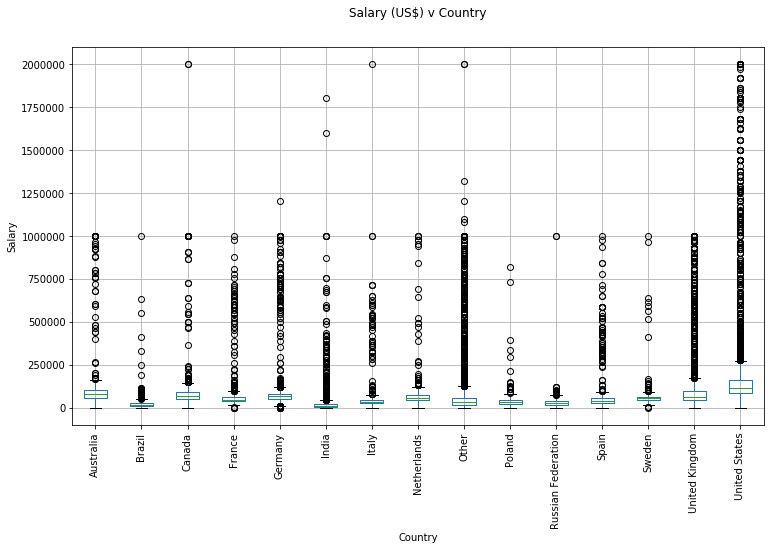

In [28]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df = df[df['Salary'] <= 250000]
df = df[df['Salary'] >= 5000]
df = df[df['Country'] != 'Other']
df = df[df['DevType'] != 'Other']
df = df[df['DevType'] != 'Other (please specify):']


In [ ]:
df.head()

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(12, 7))
df.boxplot('Salary', 'Country', ax=ax)
plt.suptitle('Salary (US$) v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df["YearsCodePro"].unique()

In [ ]:
def clean_experience(x):
    if x ==  'More than 50 years':
        return 50
    if x == 'Less than 1 year':
        return 0.5
    return float(x)

df['YearsCodePro'] = df['YearsCodePro'].apply(clean_experience)

In [ ]:
df["EdLevel"].unique()

In [ ]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or 'Other doctoral' in x:
        return 'Post grad'
    return 'Less than a Bachelors'

df['EdLevel'] = df['EdLevel'].apply(clean_education)

In [ ]:
df["EdLevel"].unique()

In [ ]:
df.isnull().sum()

In [ ]:
e={'Bachelor’s degree':1, 'Master’s degree':2, 'Less than a Bachelors':0,
       'Post grad':3}
df['EdLevel'] = df['EdLevel'].map(e)

In [ ]:
c={'Other': 0,  
    'United States': 2,
    'India': 1,
    'United Kingdom': 3,
    'Germany': 4,
    'Canada': 5,
    'Brazil': 6,
    'France': 7,
    'Spain': 8,
    'Australia': 9,
    'Netherlands': 10,
    'Poland': 11,
    'Italy': 12,
    'Russian Federation': 13,
    'Sweden': 14 }
df['Country'] =df['Country'].map(c)

In [ ]:
d = {'Developer, back-end': 0,
     'Developer, full-stack': 1,
     'Database administrator': 2,
     'Developer, front-end': 3,
     'Data or business analyst': 4,
     'Academic researcher': 5,
     'Designer': 6,
     'Developer, desktop or enterprise applications': 7,
     'Data scientist or machine learning specialist': 8,
     'Developer, mobile': 9,
     'Developer, embedded applications or devices': 10,
     'Other': 11,
     'DevOps specialist': 12,
     'Developer, QA or test': 13,
     'Engineer, data': 14,
     'Engineering manager': 15,
     'Developer, game or graphics': 16}

df['DevType'] = df['DevType'].map(d)


In [ ]:
df.isnull().sum()

In [ ]:
X = df.drop("Salary", axis=1)
y = df["Salary"]

In [ ]:
## Check for multicollinearity
import seaborn as sns

plt.figure(figsize=(12,10))
corr=df.corr()
sns.heatmap(corr,annot=True)

In [ ]:
##Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2,random_state = 42)

# print the shape of the training and testing datasets
print(f"Shape of X_train :{X_train.shape}\nShape of X_test: {X_test.shape}",
      f"\nShape of y_train: {y_train.shape}\nShape of y_test: {y_test.shape}")

In [ ]:
## Standardize the dataset
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [ ]:
X_train_scaled=scaler.fit_transform(X_train)

In [ ]:
X_test_scaled=scaler.transform(X_test)

In [ ]:
import pickle
pickle.dump(scaler,open('scaling.pkl','wb'))

In [ ]:
X_train_scaled

In [ ]:
X_test_scaled

## Box Plots To understand Effect Of Standard Scaler

In [ ]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')
plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

## Building Prediction Models

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train_scaled,y_train)

In [ ]:
## print the coefficients and the intercept
print(linear_reg.coef_)
print(linear_reg.intercept_)

In [ ]:
## on which parameters the model has been trained
linear_reg.get_params()

## Evaluation metrics for Regression analysis

In [ ]:
from sklearn import metrics
 
    print('Mean Absolute Error (MAE):', round(metrics.mean_absolute_error(y_test, y_pred),3))  

    print('Mean Squared Error (MSE):', round(metrics.mean_squared_error(y_test, y_pred),3))  

    print('Root Mean Squared Error (RMSE):', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),3))

    print('R2_score:', round(metrics.r2_score(y_test, y_pred),6))

    print('Root Mean Squared Log Error (RMSLE):', round(np.log(np.sqrt(metrics.mean_squared_error(y_test, y_pred))),3))


In [ ]:
y_pred = linear_reg.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import r2_score
linear_score=r2_score(y_test,y_pred)
print(linear_score)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
error = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
error

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor(random_state=1)
dec_tree_reg.fit(X_train_scaled,y_train)

In [ ]:
y_pred = dec_tree_reg.predict(X_test_scaled)

In [ ]:
Dec_tree_score=r2_score(y_test,y_pred)
print(Dec_tree_score)

In [ ]:
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("${:,.02f}".format(error))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest_reg = RandomForestRegressor(random_state=1)
random_forest_reg.fit(X_train_scaled,y_train)

In [ ]:
y_pred = random_forest_reg.predict(X_test_scaled)

In [ ]:
random_forest_score=r2_score(y_test,y_pred)
print(random_forest_score)

In [ ]:
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("${:,.02f}".format(error))

In [ ]:
from sklearn.model_selection import GridSearchCV

max_depth = [None, 2,4,6,8,10,12]
parameters = {"max_depth": max_depth}

regressor = DecisionTreeRegressor(random_state=0)
gs = GridSearchCV(regressor, parameters, scoring='neg_mean_squared_error')
gs.fit(X_train_scaled,y_train)

In [ ]:
regressor = gs.best_estimator_

regressor.fit(X_train_scaled,y_train)
y_pred = regressor.predict(X_test_scaled)
error = np.sqrt(mean_squared_error(y_test, y_pred))
print("${:,.02f}".format(error))

In [ ]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

In [ ]:
X

In [ ]:
# country, edlevel, yearscode
X = np.array([["United States", 'Master’s degree', 'Developer, full-stack', 15 ]])
X

In [ ]:
'''X[:, 0] = le_country.transform(X[:,0])
X[:, 1] = le_education.transform(X[:,1])
X = X.astype(float)
X'''

In [ ]:
import pandas as pd

# Assuming X is your feature matrix
country_mapping = {country: i for i, country in enumerate(np.unique(X[:, 0]))}
education_mapping = {education: i for i, education in enumerate(np.unique(X[:, 1]))}
devtype_mapping = {devtype: i for i, devtype in enumerate(np.unique(X[:, 2]))}


# Apply the mapping to the respective columns
X[:, 0] = np.vectorize(country_mapping.get)(X[:, 0])
X[:, 1] = np.vectorize(education_mapping.get)(X[:, 1])
X[:, 2] = np.vectorize(devtype_mapping.get)(X[:, 2])

# Convert the entire matrix to float
X = X.astype(float)

# Print the modified feature matrix
print(X)


In [ ]:
y_pred = regressor.predict(X)
y_pred

## Pickling The Model file For Deployment

In [ ]:
import pickle

In [ ]:
data = {"model": regressor, "country_mapping": country_mapping, "education_mapping": education_mapping, "devtype_mapping":devtype_mapping}
with open('regmodel.pkl', 'wb') as file:
    pickle.dump(data, file)

In [ ]:
with open('regmodel.pkl', 'rb') as file:
    data = pickle.load(file)

regressor_loaded = data["model"]
country_mapping = data["country_mapping"]
education_mapping = data["education_mapping"]
devtype_mapping  = data['devtype_mapping']

In [ ]:
y_pred = regressor_loaded.predict(X)
y_pred